# Read Data from a Vaisala WXT536

----

<img src="../images/Vaisala_WXT536.jpeg" width=250 alt="Vaisala_WXT536"></img>

## Overview


The Vaisala WXT536 is an multi-parameter weather sensor that measures atmospheric temperatures, pressure, humdity, wind speed and direction, and precipitation. 

High quality atmospheric observations allow for understanding of the environmental conditions at the location of the instrument, and allow us to estimate transport of gas and particles through the atmosphere. 

In combination with additional sensors attached to a CROCUS Level 3 Node, we are then able to evaluate the concentration of pollutants at the node, the transport of these pollutants into and out of the area of the node, and estimate removal of these pollutants from the atmosphere from preciptiation. 


## Prerequisites

All WXT-536s are installed into a Waggle Edge Computing server as apart of CROCUS's Level 1 Nodes. 

The Waggle Edge Computing server allows for real-time modification of sensors parameters and dynamical modification of data through edge processing codes.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Waggle Sensors](https://github.com/waggle-sensor) | Helpful | Familiarity with Waggle Sensors|
| [Waggle/Sage Data Client](https://github.com/sagecontinuum/sage-data-client) | Necessary | Accessing Data |
| [Working with Pandas Dataframes](https://foundations.projectpythia.org/core/pandas.html) | Necessary | Understanding Data Object

- **Time to Learn**: 60 minutes

## Interact with WXT-536 Data

We will be accessing data from a CROCUS Level 3 Node (W08D), which is located at Northeastern Illinois University, which has the same WXT sensor as the one deployed at the Argonne Testbed for Multiscale Observational Science (ATMOS), shown below.

<img src="../images/CROCUS_Level1_Node_WXT.jpeg" width=250 alt="CROCUS Level 1 Node (W057)"></img>

## Imports
We need some core packages to work with the data.

In [1]:
import sage_data_client
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.dates import DateFormatter

## Searching for the Data

Please check the [Waggle Node W08D User Interface](https://crocus.sagecontinuum.org/node/W08D) to determine if the *vaisala-wxt536* plugin is working

The [vaisala-wxt536 plugin](https://github.com/jrobrien91/waggle-wxt536) allows for the Waggle Sensor to interpret data sent from the instrument to the Waggle Node and transit this data to cloud storage for investigation.

To Query data from a Waggle Sensor, we will need:
1. Start of time period we are interested in (YYYY-MM-DDTHH:MM:SSZ format)
1. End of time period we are interested in (YYYY-MM-DDTHH:MM:SSZ format)
1. Waggle Node Number (e.g. W08D)
1. Sensor Name (e.g. 'vaisala-wxt536')

In [2]:
# Query the SAGE data client to access the data
# Note: We need to know the time period we are interested in
df = sage_data_client.query(start="2023-07-02T12:00:00Z",
                            end="2023-07-02T13:00:00Z", 
                            filter={
                                "vsn": "W08D",
                                "sensor": "vaisala-wxt536"
                            }
)

In [3]:
df = df.set_index("timestamp")

In [4]:
# Detemine the number of rows within the dataset
df.index

DatetimeIndex(['2023-07-02 12:00:00.029156535+00:00',
               '2023-07-02 12:00:00.107252119+00:00',
               '2023-07-02 12:00:00.206164123+00:00',
               '2023-07-02 12:00:00.283311181+00:00',
               '2023-07-02 12:00:00.364271449+00:00',
               '2023-07-02 12:00:00.442495483+00:00',
               '2023-07-02 12:00:00.525232643+00:00',
               '2023-07-02 12:00:00.610763159+00:00',
               '2023-07-02 12:00:00.697874627+00:00',
               '2023-07-02 12:00:00.778449770+00:00',
               ...
               '2023-07-02 12:59:59.200688231+00:00',
               '2023-07-02 12:59:59.280641431+00:00',
               '2023-07-02 12:59:59.361137582+00:00',
               '2023-07-02 12:59:59.441958059+00:00',
               '2023-07-02 12:59:59.520813355+00:00',
               '2023-07-02 12:59:59.600882716+00:00',
               '2023-07-02 12:59:59.684669667+00:00',
               '2023-07-02 12:59:59.760763484+00:00',
         

In [5]:
# Determine number of columns within dataset
df.columns

Index(['name', 'value', 'meta.host', 'meta.job', 'meta.missing', 'meta.node',
       'meta.plugin', 'meta.sensor', 'meta.task', 'meta.units', 'meta.vsn',
       'meta.zone'],
      dtype='object')

In [6]:
# Determine the number of unique measurements within 'name' column
print(set(df['name']))

{'wxt.wind.direction', 'wxt.env.pressure', 'wxt.env.temp', 'wxt.env.humidity', 'wxt.rain.accumulation', 'wxt.heater.temp', 'wxt.heater.volt', 'wxt.wind.speed'}


<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Data will only be returned for valid dates. Otherwise, dataframe object will contain nothing
</div>

In [7]:
# Query the SAGE data client to access the data
# Note: We need to know the time period we are interested in
no_data_df = sage_data_client.query(start="2099-04-10T12:00:00Z",
                                    end="2099-04-10T15:00:00Z", 
                                    filter={
                                        "vsn": "W08D",
                                        "sensor": "vaisala-wxt536"
                                    }
)

In [8]:
no_data_df

,timestamp,name,value


## Investigate the Dataset

To investigate the dataset, it is helpful to know how to access specific rows or columns within the data

We will then display the ambient temperature of the dataset, in coordination with wind speed and direction

In [9]:
# isolate the environmental temperature data
df.loc[df['name'] == 'wxt.env.temp']

,name,value,meta.host,meta.job,meta.missing,meta.node,meta.plugin,meta.sensor,meta.task,meta.units,meta.vsn,meta.zone
timestamp,,,,,,,,,,,,
2023-07-02 12:00:00.029156535+00:00,wxt.env.temp,20.6,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
2023-07-02 12:00:00.107252119+00:00,wxt.env.temp,20.6,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
2023-07-02 12:00:00.206164123+00:00,wxt.env.temp,20.6,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
2023-07-02 12:00:00.283311181+00:00,wxt.env.temp,20.6,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
2023-07-02 12:00:00.364271449+00:00,wxt.env.temp,20.6,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 12:59:59.600882716+00:00,wxt.env.temp,20.3,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
2023-07-02 12:59:59.684669667+00:00,wxt.env.temp,20.3,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
2023-07-02 12:59:59.760763484+00:00,wxt.env.temp,20.3,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core


### Plot the Temperature
Let's start by plotting the temperature. This is stored as the `wxt.env.temp` variable, with units of degrees Celsius. We use Pandas directly here, calling `.plot()` with some extra parameters.

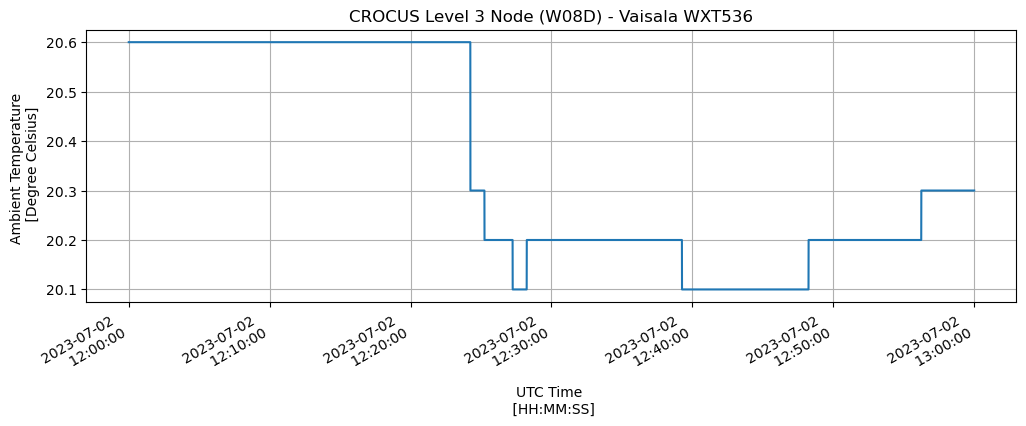

In [10]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
df.loc[df['name'] == 'wxt.env.temp'].value.plot(
                                   xlabel='UTC Time \n [HH:MM:SS]',
                                   ylabel='Ambient Temperature \n [Degree Celsius]',
                                   title='CROCUS Level 3 Node (W08D) - Vaisala WXT536',
                                   ax=axs
                                  )

axs.xaxis.set_major_formatter(date_form)
axs.grid(True)

### Plot the Rainfall Accumulation
One of the variables in the dataset is `wxt.rain.accumulation`. This is a total of the rainfall since the instrument was first configured. We can use this to determine the **event total** using an additional calculation. The total rainfall can be calculated by subtracting the total by the first value of the event period.

We start by subsetting our accumulation variable.

In [11]:
accumulation = df.loc[df['name'] == 'wxt.rain.accumulation']

After subsetting our field, we calculate the event total, as described in the previous section.

In [12]:
single_event_total = accumulation.value - accumulation.value.values[0]

Now we can plot the results! Adding in proper units and labels.

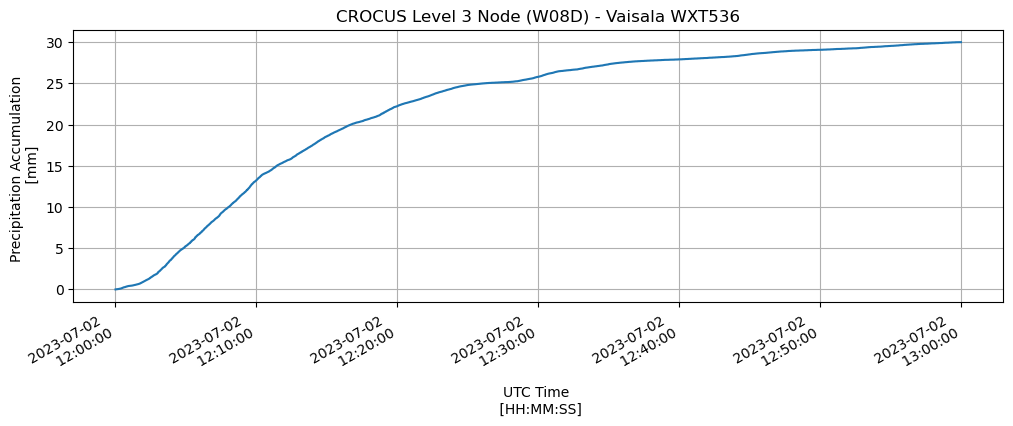

In [13]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Note: Since we already subset the data, we use our processed single_event_total variable
single_event_total.plot(xlabel='UTC Time \n [HH:MM:SS]',
                        ylabel='Precipitation Accumulation \n [mm]',
                        title='CROCUS Level 3 Node (W08D) - Vaisala WXT536',
                        ax=axs
                       )

axs.xaxis.set_major_formatter(date_form)
axs.grid(True)

### Plot the Wind Speed/Wind Direction
Wind speed and direction are important meteorological variables. We can plot two variables on a single plot, with different y-axes, allowing us to see how wind speed and direction vary across time.

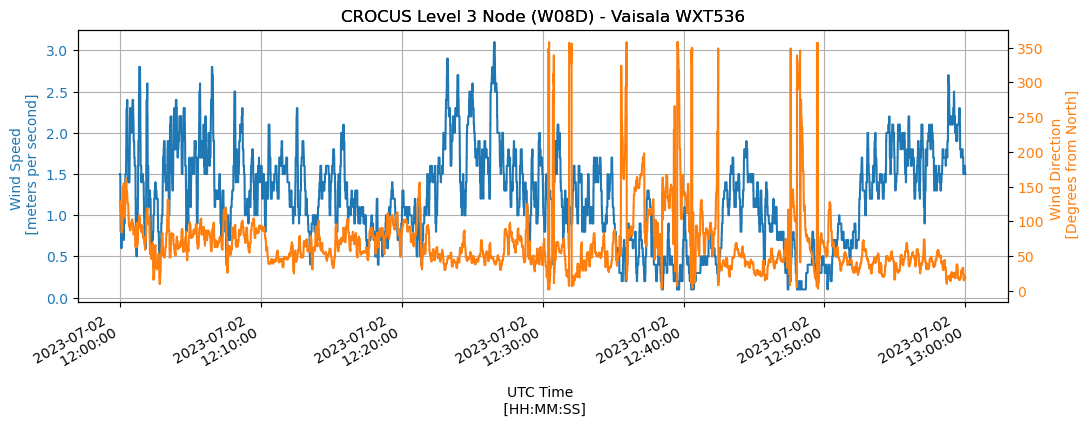

In [14]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the wind speed
df.loc[df['name'] == 'wxt.wind.speed'].value.plot(
                                           xlabel='UTC Time \n [HH:MM:SS]',
                                           ylabel='Wind Speed \n [meters per second]',
                                           title='CROCUS Level 3 Node (W08D) - Vaisala WXT536',
                                           ax=axs,
                                           color='C0'
                                          )
# Set the left hand y-axis label and color to match variable displayed
axs.set_ylabel('Wind Speed \n [meters per second]', 
               color='tab:blue',
               )
# Change left hand y-axis tick colors to match variable displayed
axs.tick_params(axis='y', labelcolor='tab:blue')

ax2 = axs.twinx()  # instantiate a second axes that shares the same x-axis

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the wind direction
df.loc[df['name'] == 'wxt.wind.direction'].value.plot(
                                                xlabel='UTC Time \n [HH:MM:SS]',
                                                title='CROCUS Level 3 Node (W08D) - Vaisala WXT536',
                                                ax=ax2,
                                                color='C1'
                                               )
ax2.set_ylabel('Wind Direction \n [Degrees from North]', 
               color='tab:orange',
               )
ax2.tick_params(axis='y', labelcolor='tab:orange')

axs.xaxis.set_major_formatter(date_form)
axs.grid(True)

## Display Diurnal Temperature Cycle 

Let's Grab all temperature data available to visualize the daily cycle

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    If you are only interested in a specific measurement,
    you can also query specific variables using the 'name' filter
</div>

In [15]:
# Query the SAGE data client to access the data; use 'name' filter

df_temp = sage_data_client.query(start="2023-07-02T00:00:00Z",
                                 end="2023-07-03T00:00:00Z", 
                                    filter={
                                        "name" : 'wxt.env.temp',
                                        "vsn": "W08D",
                                        "sensor": "vaisala-wxt536"
                                    }
)

In [16]:
df_temp

,timestamp,name,value,meta.host,meta.job,meta.missing,meta.node,meta.plugin,meta.sensor,meta.task,meta.units,meta.vsn,meta.zone
0,2023-07-02 00:00:00.045553673+00:00,wxt.env.temp,23.1,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
1,2023-07-02 00:00:00.139277863+00:00,wxt.env.temp,23.1,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
2,2023-07-02 00:00:00.247003531+00:00,wxt.env.temp,23.1,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
3,2023-07-02 00:00:00.333327344+00:00,wxt.env.temp,23.1,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
4,2023-07-02 00:00:00.413374638+00:00,wxt.env.temp,23.1,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052501,2023-07-02 23:59:59.631203637+00:00,wxt.env.temp,17.9,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
1052502,2023-07-02 23:59:59.713241159+00:00,wxt.env.temp,17.9,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
1052503,2023-07-02 23:59:59.790870013+00:00,wxt.env.temp,17.9,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core
1052504,2023-07-02 23:59:59.872975312+00:00,wxt.env.temp,17.9,000048b02d3ae277.ws-nxcore,waggle-wxt536,-9999.9,000048b02d3ae277,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,degree Celsius,W08D,core


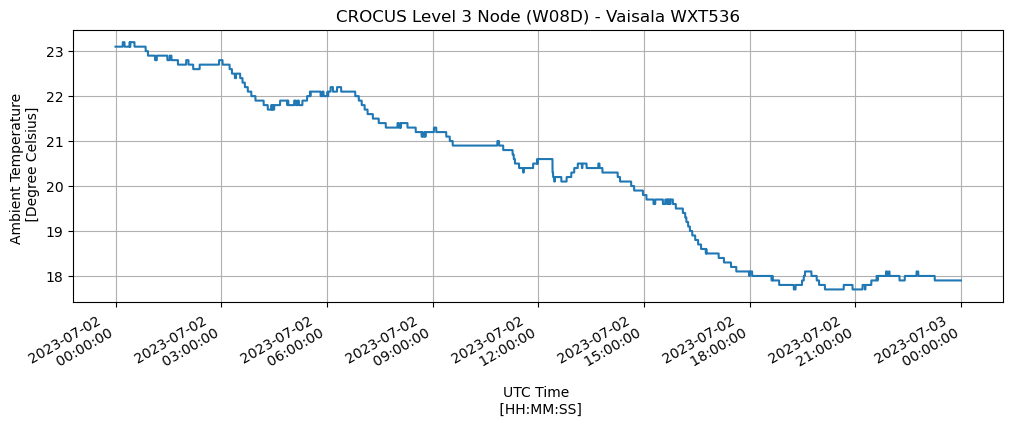

In [17]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
df_temp.set_index('timestamp').value.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 3 Node (W08D) - Vaisala WXT536',
                                          ax=axs
                                          )

axs.xaxis.set_major_formatter(date_form)
axs.grid(True)

## Save Your Selected Dataset

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Be careful! Saving data in a comma separated values (CSV) file format takes up a lot of space!
</div>

In [18]:
# Instead of saving every value explored previously, I am just going to save the variable I am interested in (i.e. temperature)
# Comma Separated Values (CSV) files are common text files that can be read with any text editor (or Microsoft Excel / Mac Numbers)
df_temp.to_csv('wxt536_W08D_ambient_temp.csv')

In [19]:
# Let's check the size of that file using simple unix commands
!ls -lh 'wxt536_W08D_ambient_temp.csv'

-rw-r--r--  1 mgrover  staff   242M Aug 15 09:08 wxt536_W08D_ambient_temp.csv


- 242M MB is a large file for just one environmental parameter. 
- It would be much larger if we saved all the observations for an hour (or day, or week, or month, etc)

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Pandas DataFrames support multiple file formats for saving data, including binary Parquet files. This allows us to compress the data and save space
</div>

In [20]:
df_temp.to_parquet('wxt536_W08D_ambient_temp.parquet',
                   use_deprecated_int96_timestamps=True)

In [21]:
# Let's check the size of the parquet file
!ls -lh 'wxt536_W08D_ambient_temp.parquet'

-rw-r--r--  1 mgrover  staff   7.2M Aug 15 09:08 wxt536_W08D_ambient_temp.parquet


- Only 7.2MB saving the same data as this format!
- Less than 4% of the space taken up by the same data in CSV format!